In [1]:
from rockpool.nn.modules import LIFJax, LinearJax
from rockpool.nn.combinators import Sequential

In [2]:
from rockpool.devices.dynapse.dynapsim import DynapSim

In [4]:
# net = Sequential(
#     LinearJax((5, 10)),
#     LIFJax((10,)),
#     LinearJax((10, 20)),
#     LIFJax((20,))
# )

# # Train...

# graph = net.as_graph()
# dse_spec = dynapse.mapper(graph)
# Q_dse_spec = dynapse.quantise(dse_spec) # Uses `WeightParameters`

# dsim_net = DynapSim.from_specification(Q_dse_spec)
# dsamna_net = DynapSamna.from_specification(Q_dse_spec)

# # or

# high_level_config = ...
# low_level_hw_config = samna.dynapse.config....

# dse_config = dynapse.config_from_specification(Q_dse_spec)

# dsim_net = DynapSim(high_level_config)
# dsim_net = DynapSim(low_level_hw_config)

# hdk_device = dynapse.find_dynapse_hdks()[0]

# dsamna_net = DynapSamna(low_level_hw_config: samna.dynapse.config.DynapSE2Configuration, hdk_device, dt = 1e-3)
# dsamna_net = DynapSamna(high_level_config: rockpoo.devices.dynapse.config..., hdk_device, dt = 1e-3)

In [5]:
net

JaxSequential  with shape (5, 20) {
    LinearJax '0_LinearJax' with shape (5, 10)
    LIFJax '1_LIFJax' with shape (10, 10)
    LinearJax '2_LinearJax' with shape (10, 20)
    LIFJax '3_LIFJax' with shape (20, 20)
}

In [6]:
N = 10

ds_mod = DynapSim.from_specification(
    (4 * N, N),
)

In [99]:
dse_net = Sequential(
    LinearJax((5, 4*8)),
    DynapSim.from_specification((4*8, 8), dt = 1e-3),
    LinearJax((8, 4*10)),
    DynapSim.from_specification((4*10, 10), dt = 1e-3),
)
dse_net

JaxSequential  with shape (5, 10) {
    LinearJax '0_LinearJax' with shape (5, 32)
    DynapSim '1_DynapSim' with shape (32, 8)
    LinearJax '2_LinearJax' with shape (8, 40)
    DynapSim '3_DynapSim' with shape (40, 10)
}

In [100]:
dse_net.state()

{'0_LinearJax': {},
 '1_DynapSim': {'iahp': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'iampa': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'igaba': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'imem': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'inmda': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'ishunt': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'spikes': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'timer_ref': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'vmem': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'rng_key': DeviceArray

In [90]:
dse_net[0].weight = np.clip(dse_net[0].weight * 1e-12, -np.inf, np.inf)
# dse_net[0].weight

dse_net[2].weight = np.clip(dse_net[2].weight * 1e-12, -np.inf, np.inf)
# dse_net[2].weight

In [91]:
import jax
import matplotlib.pyplot as plt

In [92]:
# jdse_net = jax.jit(dse_net)

In [93]:
import numpy as np

fP = 0.01
T = 1000
dt = 1e-3
spikes = np.random.rand(T, 5) < fP

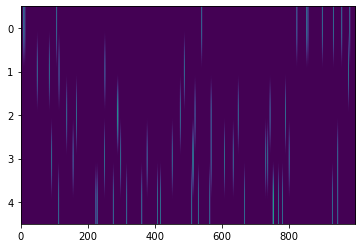

In [94]:
plt.imshow(spikes.T, aspect='auto')

In [95]:
out, state, record_dict = dse_net(spikes, record = True)

In [96]:
out

DeviceArray([[ 0.,  0., 16., ...,  0.,  0., 13.],
             [ 0.,  0., 39., ...,  0.,  0., 33.],
             [ 0.,  0., 65., ...,  0.,  0., 56.],
             ...,
             [ 0.,  0.,  0., ...,  0.,  0.,  0.],
             [ 0.,  0.,  0., ...,  0.,  0.,  0.],
             [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

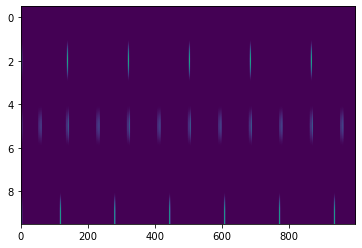

In [97]:
plt.imshow(out.T, aspect = 'auto')

In [98]:
state

{'0_LinearJax': {},
 '1_DynapSim': {'iahp': DeviceArray([4.7445035e-09, 4.8941943e-13, 1.0226299e-08, 4.8669976e-13,
               2.6895193e-09, 3.2034362e-09, 1.0671010e-08, 4.8825890e-13],            dtype=float32),
  'iampa': DeviceArray([4.8975114e-13, 4.8941943e-13, 4.8642150e-13, 4.8669976e-13,
               1.8263687e-01, 5.0093089e-13, 1.4385395e-01, 4.8825890e-13],            dtype=float32),
  'igaba': DeviceArray([4.8975114e-13, 4.8941943e-13, 1.4389985e-02, 4.8669976e-13,
               6.8845199e-03, 5.0093089e-13, 5.0530896e-13, 4.8825890e-13],            dtype=float32),
  'imem': DeviceArray([4.8975114e-13, 4.8941943e-13, 4.8642150e-13, 4.8669976e-13,
               5.1325816e-13, 5.0093089e-13, 5.0530896e-13, 4.8825890e-13],            dtype=float32),
  'inmda': DeviceArray([1.4603990e-01, 4.8941943e-13, 1.1686010e-01, 4.8669976e-13,
               1.2872547e-01, 1.4423564e-01, 1.6403776e-01, 8.2406938e-02],            dtype=float32),
  'ishunt': DeviceArray([4.897511

In [ ]:
new_params = devices.dynapse.regen_mismatch(net)
    # - Iterate through network
    # Look for DynapSim modules
    # Generate new mismatched parameters for all DynapSim modules
    # Return the new parameter dict for the entire network
net = net.set_attributes(new_params)

In [ ]:
DynapSim(use_mismatch = True, mismatch_scale = 0.05, mismatch_sigma_rule = 2.0)